In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import StackingClassifier, VotingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from imblearn.under_sampling import RandomUnderSampler

In [2]:
data = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [3]:
data.shape

(253680, 22)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
data.rename(columns={'HeartDiseaseorAttack':'Attack'},inplace=True)

In [6]:
data

,Attack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [7]:
data.isnull().sum()

Attack               0
HighBP               0
HighChol             0
CholCheck            0
BMI                  0
Smoker               0
Stroke               0
Diabetes             0
PhysActivity         0
Fruits               0
Veggies              0
HvyAlcoholConsump    0
AnyHealthcare        0
NoDocbcCost          0
GenHlth              0
MentHlth             0
PhysHlth             0
DiffWalk             0
Sex                  0
Age                  0
Education            0
Income               0
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Attack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [9]:
data['Attack'].value_counts(normalize=True)

0.0    0.905814
1.0    0.094186
Name: Attack, dtype: float64

### Train Test Split

In [10]:
x = data.drop(columns=['Attack'])
y = data['Attack']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,
                                                 stratify=y,random_state=1)

In [12]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(190260, 21) (190260,) (63420, 21) (63420,)


### Balance the Data

In [13]:
u_samp = RandomUnderSampler(sampling_strategy=0.45)

In [14]:
x_train_s,y_train_s = u_samp.fit_resample(x_train,y_train)

In [15]:
x_train_s.shape

(57742, 21)

In [16]:
y_train_s.value_counts(normalize=True)

0.0    0.689654
1.0    0.310346
Name: Attack, dtype: float64

### Random Forest

In [17]:
params = {'n_estimators':[300,200],
         'criterion':['entropy'],
         'max_depth':[8,9,10]}

In [18]:
gscv = GridSearchCV(estimator=RandomForestClassifier(),
                   param_grid = params,
                   scoring='f1',
                   cv=3,verbose=3)

In [19]:
gscv.fit(x_train_s,y_train_s)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END criterion=entropy, max_depth=8, n_estimators=300;, score=0.588 total time=   4.9s
[CV 2/3] END criterion=entropy, max_depth=8, n_estimators=300;, score=0.602 total time=   4.9s
[CV 3/3] END criterion=entropy, max_depth=8, n_estimators=300;, score=0.604 total time=   4.9s
[CV 1/3] END criterion=entropy, max_depth=8, n_estimators=200;, score=0.587 total time=   3.2s
[CV 2/3] END criterion=entropy, max_depth=8, n_estimators=200;, score=0.602 total time=   3.2s
[CV 3/3] END criterion=entropy, max_depth=8, n_estimators=200;, score=0.604 total time=   3.2s
[CV 1/3] END criterion=entropy, max_depth=9, n_estimators=300;, score=0.594 total time=   5.4s
[CV 2/3] END criterion=entropy, max_depth=9, n_estimators=300;, score=0.611 total time=   5.3s
[CV 3/3] END criterion=entropy, max_depth=9, n_estimators=300;, score=0.611 total time=   5.3s
[CV 1/3] END criterion=entropy, max_depth=9, n_estimators=200;, score=0.592 total tim

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [8, 9, 10],
                         'n_estimators': [300, 200]},
             scoring='f1', verbose=3)

In [20]:
gscv.best_score_

0.6101930858905562

In [21]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}

In [22]:
def validation(test,pred):
    print('Accuracy Score:',accuracy_score(test,pred))
    print('Confusion Matrix:\n',confusion_matrix(test,pred))
    print('Classification report:\n',classification_report(test,pred))

In [23]:
def roc_cur(test,pred):
    fpr,tpr,thres = roc_curve(test,pred)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],color='r',ls='--')
    plt.title('ROC AUC %.2f'%roc_auc_score(test,pred))
    plt.show()

In [24]:
rf_model = RandomForestClassifier(**gscv.best_params_)

In [25]:
rf_model.fit(x_train_s,y_train_s)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200)

In [26]:
y_pred_rf = rf_model.predict(x_test)

In [27]:
validation(y_test,y_pred_rf)

Accuracy Score: 0.8544465468306528
Confusion Matrix:
 [[50938  6509]
 [ 2722  3251]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.95      0.89      0.92     57447
         1.0       0.33      0.54      0.41      5973

    accuracy                           0.85     63420
   macro avg       0.64      0.72      0.67     63420
weighted avg       0.89      0.85      0.87     63420



In [28]:
y_pred_rf_p = rf_model.predict_proba(x_test)[:,1]

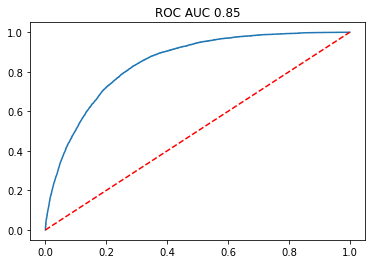

In [29]:
roc_cur(y_test,y_pred_rf_p)

In [30]:
fpr,tpr,thres = roc_curve(y_test,y_pred_rf_p)

In [31]:
yoden_index = tpr*(1-fpr)

In [32]:
pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thresh':thres,'YodenIndex':yoden_index})\
.sort_values(by='YodenIndex',ascending=False)

,FPR,TPR,Thresh,YodenIndex
6656,0.255261,0.793404,0.342108,0.590878
6676,0.257107,0.795245,0.340260,0.590783
6674,0.257072,0.795078,0.340272,0.590686
6675,0.257107,0.795078,0.340262,0.590658
6658,0.255871,0.793738,0.341488,0.590644
...,...,...,...,...
1,0.000000,0.000167,0.913370,0.000167
12004,0.999896,1.000000,0.010882,0.000104
12005,0.999930,1.000000,0.010874,0.000070
0,0.000000,0.000000,1.913370,0.000000


In [33]:
y_pred_rf_23 = [1 if i>0.4 else 0 for i in y_pred_rf_p]

In [34]:
validation(y_test,y_pred_rf_23)

Accuracy Score: 0.7930148218227688
Confusion Matrix:
 [[45988 11459]
 [ 1668  4305]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.96      0.80      0.88     57447
         1.0       0.27      0.72      0.40      5973

    accuracy                           0.79     63420
   macro avg       0.62      0.76      0.64     63420
weighted avg       0.90      0.79      0.83     63420



### Bagging with base model Naive Bayes

In [35]:
model_bagg = BaggingClassifier(base_estimator=GaussianNB(),
                              n_estimators=100)

In [36]:
model_bagg.fit(x_train_s,y_train_s)

BaggingClassifier(base_estimator=GaussianNB(), n_estimators=100)

In [37]:
y_pred_gn = model_bagg.predict(x_test)

In [38]:
validation(y_test,y_pred_gn)

Accuracy Score: 0.7816146326080101
Confusion Matrix:
 [[45790 11657]
 [ 2193  3780]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.95      0.80      0.87     57447
         1.0       0.24      0.63      0.35      5973

    accuracy                           0.78     63420
   macro avg       0.60      0.71      0.61     63420
weighted avg       0.89      0.78      0.82     63420



### Adaptive Boosting (adaboost)

In [39]:
model_ada = AdaBoostClassifier(n_estimators=300)

In [40]:
model_ada.fit(x_train_s,y_train_s)

AdaBoostClassifier(n_estimators=300)

In [41]:
y_pred_ada = model_ada.predict(x_test)

In [42]:
validation(y_test,y_pred_ada)

Accuracy Score: 0.8512929675181331
Confusion Matrix:
 [[50725  6722]
 [ 2709  3264]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.95      0.88      0.91     57447
         1.0       0.33      0.55      0.41      5973

    accuracy                           0.85     63420
   macro avg       0.64      0.71      0.66     63420
weighted avg       0.89      0.85      0.87     63420



### Gradient Boosting

In [62]:
model_gbc = GradientBoostingClassifier(n_estimators=300, max_depth=12)

In [63]:
model_gbc.fit(x_train_s,y_train_s)

GradientBoostingClassifier(max_depth=12, n_estimators=300)

In [64]:
y_pred_gbc = model_gbc.predict(x_test)

In [65]:
validation(y_test,y_pred_gbc)

Accuracy Score: 0.818653421633554
Confusion Matrix:
 [[48566  8881]
 [ 2620  3353]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.95      0.85      0.89     57447
         1.0       0.27      0.56      0.37      5973

    accuracy                           0.82     63420
   macro avg       0.61      0.70      0.63     63420
weighted avg       0.89      0.82      0.84     63420



### XGBoost Classifier

In [100]:
model_xgb = XGBClassifier(n_estimators=200,gamma=5)

In [101]:
model_xgb.fit(x_train_s,y_train_s)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [102]:
y_pred_xgb = model_xgb.predict(x_test)

In [103]:
validation(y_test,y_pred_xgb)

Accuracy Score: 0.8406811731315043
Confusion Matrix:
 [[49776  7671]
 [ 2433  3540]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.95      0.87      0.91     57447
         1.0       0.32      0.59      0.41      5973

    accuracy                           0.84     63420
   macro avg       0.63      0.73      0.66     63420
weighted avg       0.89      0.84      0.86     63420



In [104]:
y_pred_prob = model_xgb.predict_proba(x_test)[:,1]

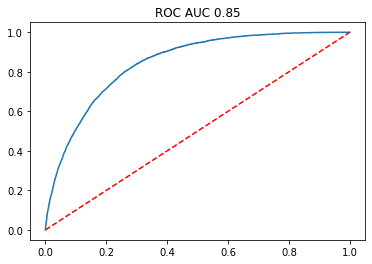

In [105]:
roc_cur(y_test,y_pred_prob)

# Hetrogeneous models 
## Voting Classifer

In [122]:
base_estimators = [('LR',LogisticRegression(max_iter=500)),
                  ('DT',DecisionTreeClassifier(max_depth=8)),
                   ('KNN',KNeighborsClassifier(n_neighbors=5)),
                  ('NB',GaussianNB())]

In [123]:
model_vot = VotingClassifier(estimators=base_estimators, voting='soft',verbose=3)

In [124]:
model_vot.fit(x_train_s,y_train_s)

[Voting] ....................... (1 of 4) Processing LR, total=   1.6s
[Voting] ....................... (2 of 4) Processing DT, total=   0.1s
[Voting] ...................... (3 of 4) Processing KNN, total=   0.0s
[Voting] ....................... (4 of 4) Processing NB, total=   0.0s


VotingClassifier(estimators=[('LR', LogisticRegression(max_iter=500)),
                             ('DT', DecisionTreeClassifier(max_depth=8)),
                             ('KNN', KNeighborsClassifier()),
                             ('NB', GaussianNB())],
                 verbose=3, voting='soft')

In [125]:
y_pred = model_vot.predict(x_test)

In [126]:
validation(y_test,y_pred)

Accuracy Score: 0.8310627562283192
Confusion Matrix:
 [[49231  8216]
 [ 2498  3475]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.95      0.86      0.90     57447
         1.0       0.30      0.58      0.39      5973

    accuracy                           0.83     63420
   macro avg       0.62      0.72      0.65     63420
weighted avg       0.89      0.83      0.85     63420



## Stacking

In [127]:
meta_model = RandomForestClassifier(max_depth=8)

In [128]:
model_stack = StackingClassifier(estimators=base_estimators,final_estimator=meta_model)

In [129]:
model_stack.fit(x_train_s,y_train_s)

StackingClassifier(estimators=[('LR', LogisticRegression(max_iter=500)),
                               ('DT', DecisionTreeClassifier(max_depth=8)),
                               ('KNN', KNeighborsClassifier()),
                               ('NB', GaussianNB())],
                   final_estimator=RandomForestClassifier(max_depth=8))

In [130]:
y_pred_stack = model_stack.predict(x_test)

In [131]:
validation(y_test,y_pred_stack)

Accuracy Score: 0.8396562598549353
Confusion Matrix:
 [[49692  7755]
 [ 2414  3559]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.95      0.87      0.91     57447
         1.0       0.31      0.60      0.41      5973

    accuracy                           0.84     63420
   macro avg       0.63      0.73      0.66     63420
weighted avg       0.89      0.84      0.86     63420

